<a href="https://colab.research.google.com/github/lbendezu80/Prueba/blob/main/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

De la clase anterior... diferencias entre una distribución logística y una normal estándar.

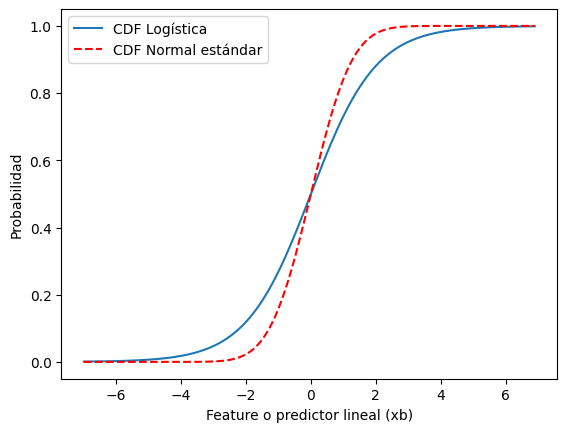

In [ ]:
x = np.arange(-7, 7, 0.1)
pd_time_logit = st.logistic.cdf(x, 0, 1)
pd_time_probit = st.norm.cdf(x, 0, 1)

plt.plot(x, pd_time_logit, label='CDF Logística')
plt.plot(x, pd_time_probit, color='red', label='CDF Normal estándar', linestyle='dashed')
plt.xlabel('Feature o predictor lineal (xb)')
plt.ylabel('Probabilidad')
plt.legend(loc='best')
plt.show()


# 1. Optimizadores basados en gradiente

## 1.1 Ejemplo sencillo

¿Cómo funciona un optimizador basado en gradiente? Ejemplo sencillo con una variable z y una función simple y = f(z) = z^2

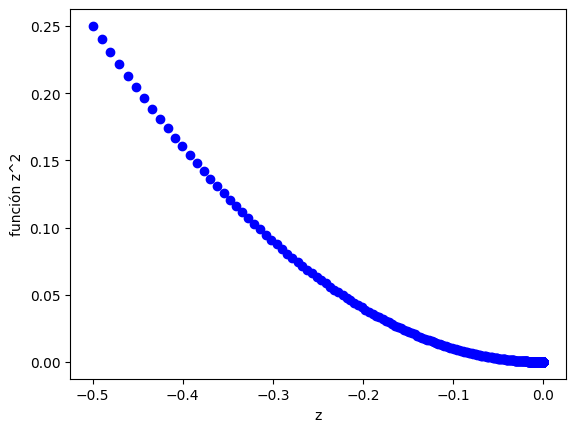

In [ ]:
def fun(z):
  return z**2

# Para minimizar la función, calculamos la primera derivada:
def deriv_fun(z):
  return 2*z

# Luego definimos los parámetros de aprendizaje y el valor inicial para iniciar la búsqueda.
lr = 0.01
z_s = -0.5

# Finalmente, comenzamos la búsqueda del mínimo partiendo del valor inicial según la fórmula del proceso iterativo:
for i in range(0,1000):
  d_f = deriv_fun(z_s)
  f = fun(z_s)
  plt.xlabel('z')
  plt.ylabel('función z^2')
  plt.plot(z_s, f,color='blue', marker='o')
  z_s = z_s - lr * d_f


Puede verse desde la iteración final que el valor de z, la función y la derivada son aproximadamente iguales a cero, lo cual indica que se ha alcanzado un mínimo global:

In [ ]:
print('z:',z_s)
print('valor de la función:',f)
print('valor de la derivada:',d_f)

z: -1.6829673572159562e-10
valor de la función: 2.949166103138755e-20
valor de la derivada: -3.4346272596244006e-10


## 1.2 Clasificador binario (PD)

Para un ejemplo puntual en el que tenemos una sola variable exógena y la variable de resultado es binaria:

Solución para el beta: -0.004


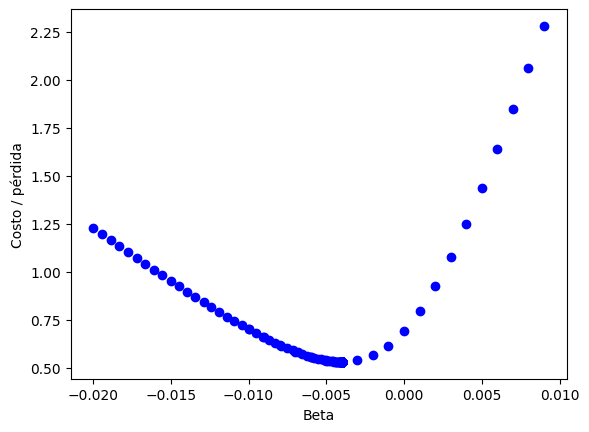

In [ ]:
x = np.array([500, 400, 300, 200, 100])
d = np.array([0, 0, 0, 1, 1])

# Primero definimos una función de costo (que es lo mismo que una función objetivo para optimizar):
def J_cost_fun_bin(beta):
  pd_pred = np.exp(beta * x)/ (1+ np.exp(beta * x))
  costs = d*np.log(pd_pred) + (1-d) * (np.log(1-pd_pred))
  cost = -np.mean(costs)
  return cost

# Calculamos distintos valores de beta y los introducimos en la función de costos:
for beta_s in range(-10, 10, 1):
  cost_beta = J_cost_fun_bin(beta_s/1000)
  plt.xlabel('Beta')
  plt.ylabel('Costo / pérdida')
  plt.plot(beta_s/1000, cost_beta, color='blue', marker='o')

# Una segunda forma parte de optimizar directamente la función de costo, para lo cual debe calcularse la primera derivada:
def J_deriv_bin(beta):
  pd_pred = np.exp(beta * x)/ (1+ np.exp(beta * x))
  tmp = np.mean(x * (pd_pred - d))
  return tmp

# Definimos los parámetros de aprendizaje y valor inicial:
lr = 0.00001
beta_s = -0.02

# Finalmente calculamos el proceso iterativo:
for i in range(0,1000):
  d_beta = J_deriv_bin(beta_s)
  cost = J_cost_fun_bin(beta_s)
  plt.xlabel('Beta')
  plt.ylabel('Costo / pérdida')
  plt.plot(beta_s, cost, color='blue', marker='o')
  beta_s = beta_s - lr * d_beta

print('Solución para el beta:', np.round(beta_s,4))



Todo el procedimiento anterior se puede resumir en tres líneas de código si importamos el statsmodels

In [ ]:
model_logit = sm.Logit(d, x)
results_logit = model_logit.fit()
print('Solución para beta:', np.round(results_logit.params,4))

Optimization terminated successfully.
         Current function value: 0.531642
         Iterations 5
Solución para beta: [-0.004]


Ya hemos minimizado la función de verosimilitud utilizando el aprendizaje basado en riesgos y statsmodels, que devuelve valores ajustados para los coeficientes, así como valores p para pruebas estadísticas. En ML, queremos obtener buenas predicciones y no estamos tan interesados en la significancia estadística. Por lo tanto, el análogo de statsmodels en ML, que es scikit-learn, también ajusta modelos pero no devuelve métricas de pruebas estadísticas. Una regresión logística se puede ajustar utilizando la clase LogisticRegression en el módulo sklearn.linear_model. También viene con varios optimizadores, la mayoría de los cuales son variantes y extensiones de gradient descent.

In [ ]:
from sklearn.linear_model import LogisticRegression

x=x.reshape(-1, 1)

model_lr = LogisticRegression(penalty=None, fit_intercept=False, solver='lbfgs', tol =1e-15, max_iter=1000)
model_lr.fit(x, d)
print('Solución para beta:', np.round(model_lr.coef_[0],4))

Solución para beta: [-0.004]



# 2. Trade off entre sesgo y varianza
Ejemplo adaptado de la documentación de scikit-learn. En el siguiente código, importamos paquetes adicionales para calcular el error cuadrático medio, regresión lineal, regresión polinomial y un procedimiento que permite la ejecución de modelos (pipeline).  Generamos data al azar con n = 20 donde x viene de una distribución uniforme y el error proviene de una distribución normal con media µ = 0 y varianza σ = 0.3. La variable de resultado es  y = sin(0.7x)+ϵ   Generamos la data de entranemitno y podemos variar sigma para ver impactos distintos.


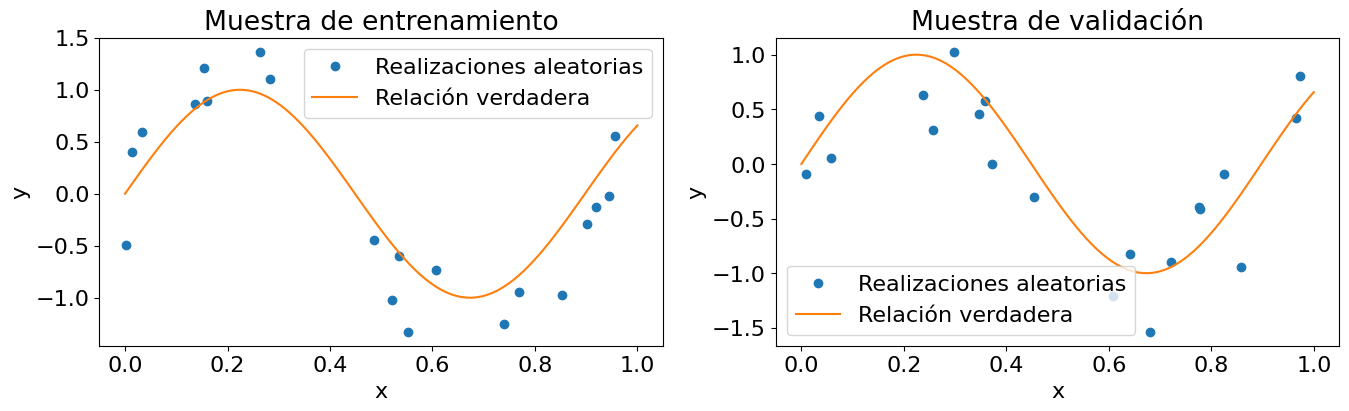

In [ ]:
np.random.seed(seed=12)
N_sim = 20
mu, sigma = 0, 0.3

x_train = np.random.uniform(low=0.0, high=1.0, size=N_sim)
eps_train = np.random.normal(mu, sigma, N_sim)
y_train = np.sin(7 * x_train) + eps_train

np.random.seed(seed=13)

x_test = np.random.uniform(low=0.0, high=1.0, size=N_sim)
eps_test = np.random.normal(mu, sigma, N_sim)
y_test = np.sin(7 * x_test) + eps_train

plt.rcParams['figure.figsize'] = (16, 4)
plt.rcParams.update({'font.size': 16})
plt.subplot(1,2,1)

x_axis = np.linspace(0, 1, 100)
y_true = np.sin(7 * x_axis)

plt.plot(x_train, y_train, linestyle='none', marker='o', label='Realizaciones aleatorias')
plt.plot(x_axis, y_true, label="Relación verdadera")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Muestra de entrenamiento')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x_test, y_test, linestyle='none', marker='o', label='Realizaciones aleatorias')
plt.plot(x_axis, y_true, label="Relación verdadera")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Muestra de validación')
plt.show()


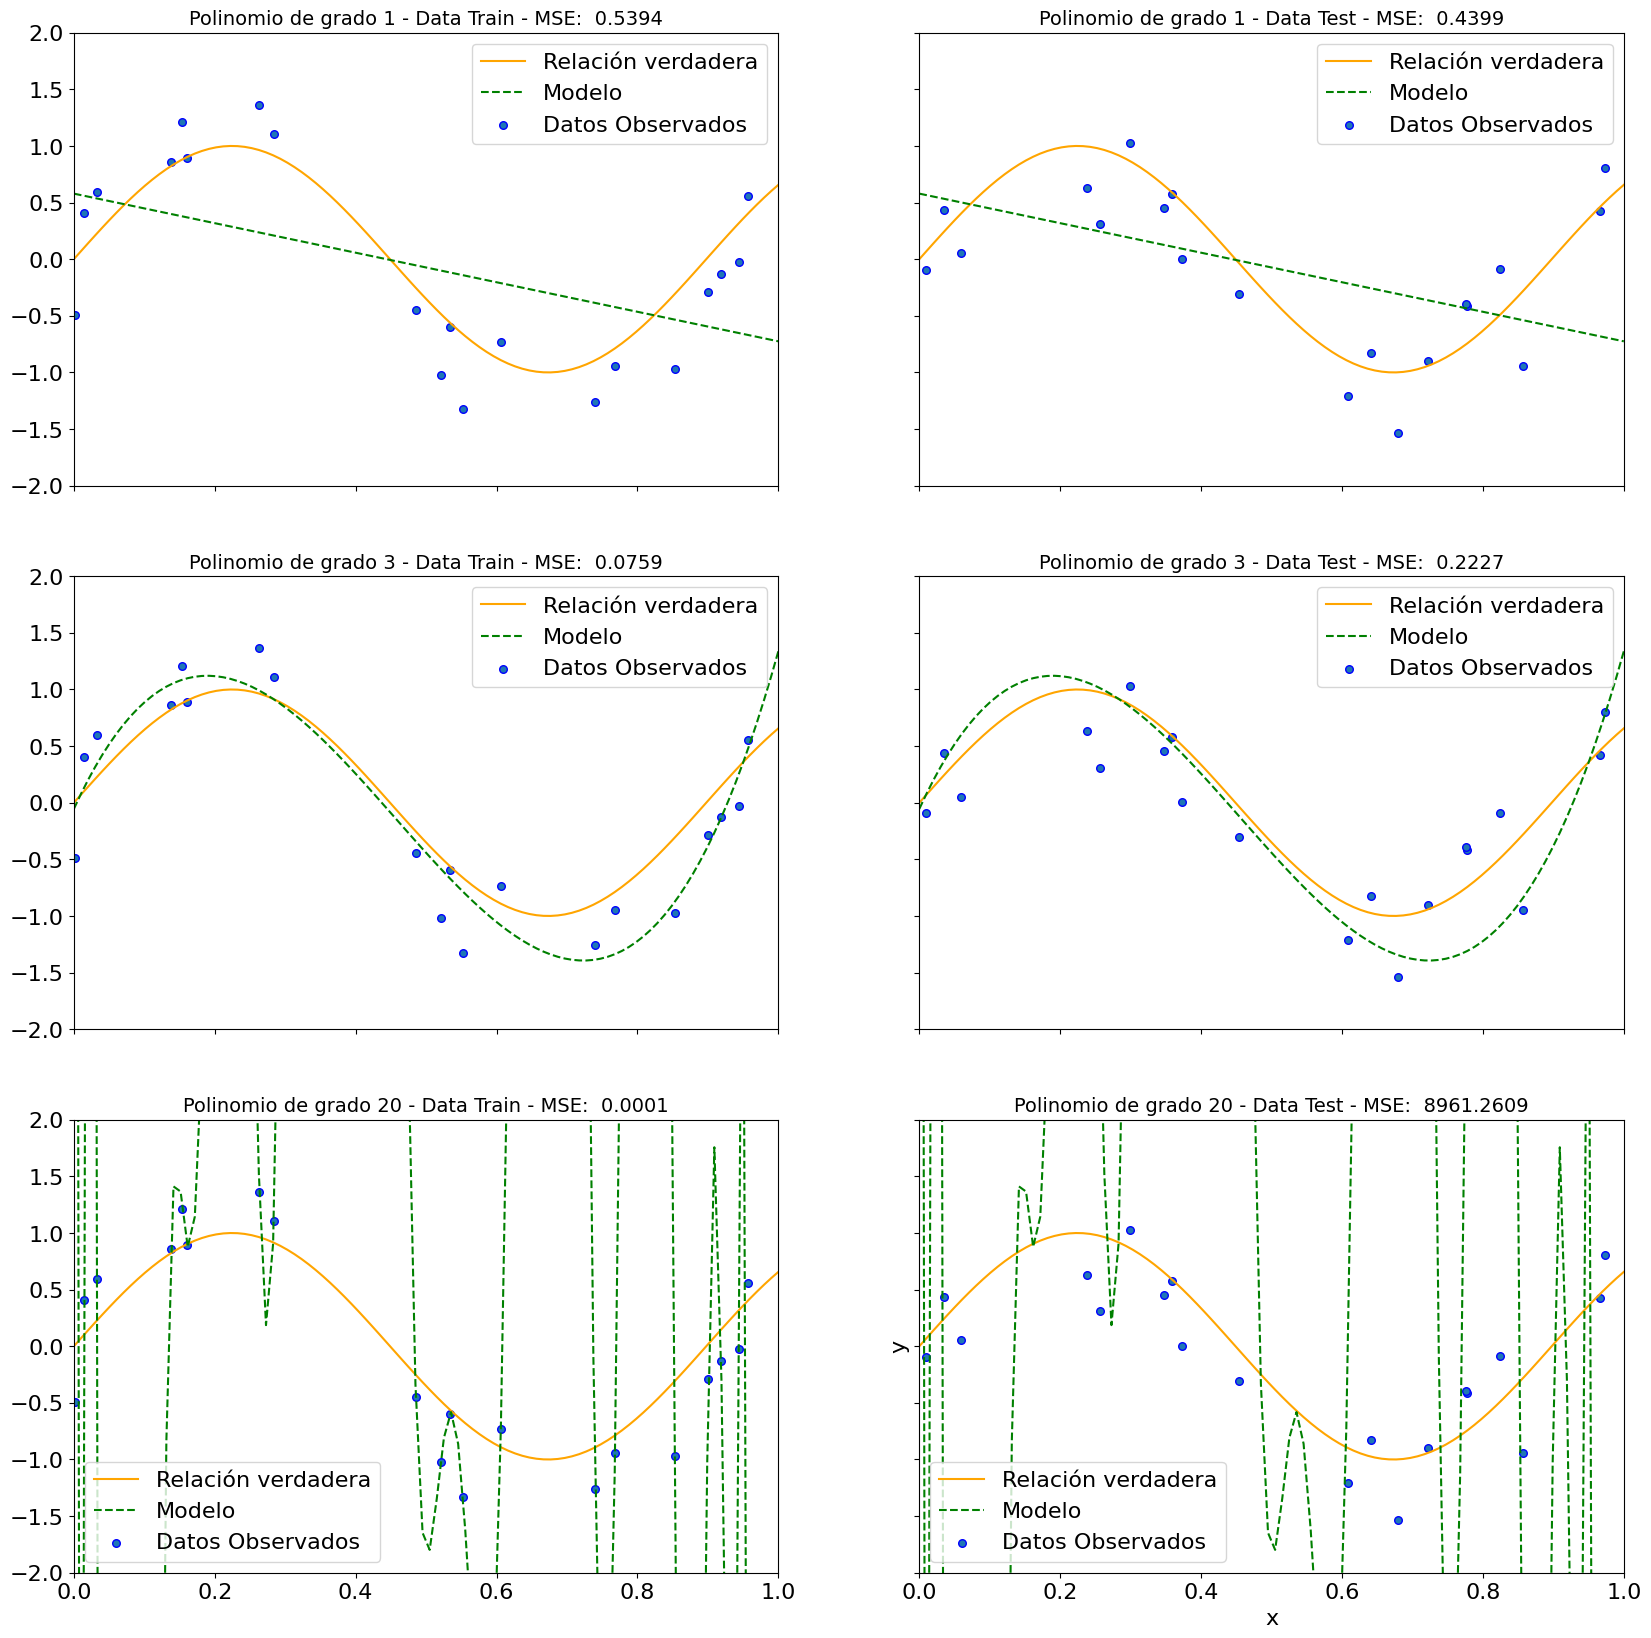

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fig, axes = plt.subplots(3,2, sharex=True, sharey=True, figsize=(20,20))
degree =[1,1,3,3,20,20]

def plot(x,y,mse,degree,data):
  ax.plot(x_axis, y_true, label="Relación verdadera", color='orange')
  ax.plot(x_axis, pipeline.predict(x_axis[:, np.newaxis]),label="Modelo", ls ='--'  , color='g')
  ax.scatter(x.reshape(-1, 1), y, edgecolor='b', s=30, label="Datos Observados")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  ax.set_title('Polinomio de grado {} -'.format(degree)+' Data {} -'.format(data) +' MSE:  {}'.format(mse), fontsize=14)
  ax.legend(loc="best")

for i,ax in enumerate(axes.flatten()):
  polynomial_features = PolynomialFeatures(degree=degree[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression'  , linear_regression)])
  pipeline.fit(x_train.reshape(-1, 1), y_train)
  x_axis = np.linspace(0, 1, 100)
  y_true = np.sin(7 * x_axis)

  if i in [0,2,4]:
    x=x_train
    y=y_train
    label='Train'
    y_pred = pipeline.predict(x.reshape(-1, 1))
    mse = mean_squared_error(y_train, y_pred).round(4)

  if i in [1,3,5]:
    x=x_test
    y=y_test
    label='Test'
    y_pred = pipeline.predict(x.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred).round(4)

  plot(x,y,mse,degree[i],label)
plt.show()